# UCI Machine Learning Repository - Adult Income Data set

For this lecture we will be working with the [Adult Income Data Set](https://archive.ics.uci.edu/ml/datasets/adult). This is a very famous data set and quite many papers have been published on the same!

We'll be trying to predict a classification- income less than equal to 50 or greater than 50
Let's begin our understanding of implementing K-Nearest Neighbour in Python for classification.

We'll use the raw version of the adult income data set, and perform some categorical variables encoding (dummy variables) in python for quite many features as the feautures are mostly String.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

Let's start by reading in the adult.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Variable Encoding (Dummy Variables)

As most of the features are in String format, we need to perform the variable encoding as we are not using the Natural Language processing yet. When we will use the NLP, we may need not to convert the features into categorical variables.

Note that the below 'income' feature could directly be converted into categorical variables using pandas, however for the sake of practice, we are first extracting the values greater than 50 ('>50') and replcing the rest with Nan, which we will later convert into categorical variables. This is just to show you how to extract data from pandas data frame columns.

In [4]:
inc = df.income.str.extract('(>\d+)')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [5]:
type(inc)

pandas.core.series.Series

Dropping the 'income' column and appending the able newly extracted 'income' column to the dataframe. 
Note that you may also do this later in the end before appending the categorical variables

In [6]:
df.drop('income', axis=1, inplace=True)

In [7]:
income = pd.concat([df, inc], axis=1)

In [8]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,NaN
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,NaN
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,NaN


## Variable Encoding (Dummy Variables)
Converting the features to categorical variables. Note that we have not removed any features as that may lead us to underfitting. Atfirst we will try with all the features, later we will tweak the model with less features if required.

In [9]:
salary = pd.get_dummies(income['income'])

In [10]:
marital = pd.get_dummies(income['marital-status'], drop_first=True)

In [11]:
work = pd.get_dummies(income['workclass'], drop_first=True)

In [12]:
country = pd.get_dummies(income['native-country'], drop_first=True)

In [13]:
sex = pd.get_dummies(income['gender'], drop_first=True)

In [14]:
ethnic = pd.get_dummies(income['race'], drop_first=True)

In [15]:
relation = pd.get_dummies(income['relationship'], drop_first=True)

In [16]:
occup = pd.get_dummies(income['occupation'], drop_first=True)

In [17]:
edu = pd.get_dummies(income['education'], drop_first=True)

Deleting all the columns from current working dataframe 'income', for which we have generated the dummy variables and store it in another data frame 'inter_data'

In [18]:
inter_data = income.drop(['income','marital-status','workclass','native-country','gender','race','relationship',
                          'occupation','education'], axis=1)

In [19]:
inter_data.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


Merging the 'income' dataframe with all the other categorical values and storing it in final dataframe 'data' to perform Scaling, Distribution, Training and Testing the model on the same

In [20]:
data = pd.concat([inter_data, salary, marital, work, country, sex, ethnic, relation, occup, edu], axis=1)

Checking if any values in dataframe is missing using the help of heatmap. The better way to do this is to check the same before converting the features to categorical variables.

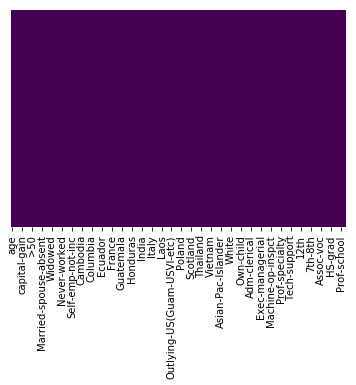

In [137]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

## Normalising / Scaling Data using Scikit Learn Standard Scaler
Normalising the data range through StandardScalar in sklearn

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(data.drop('>50', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_data = scaler.transform(data.drop('>50', axis=1))

Scaling done, now saving the scales features to a data frame

In [25]:
data.columns[6]

'>50'

In [26]:
col_name = data.columns

In [27]:
col_name = col_name.drop('>50')

In [28]:
data_feature = pd.DataFrame(scaled_data, columns=col_name)

# Splitting Data into Training & Test Data Set
Now Splitting the Data into Training & Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_feature, data['>50'], test_size = 0.33, random_state = 101)

# Creating Model, Training and Testing it
Now Creating Model & Training & Testing Data

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
pred = knn.predict(X_test)

# Evaluating Model using Metrics
Model Trained and tested, now evaluating the model using metrics.
Using Classification Report & Confusion Metrics for the same

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [54]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89     12218
          1       0.70      0.52      0.60      3900

avg / total       0.82      0.83      0.82     16118



[[11349   869]
 [ 1875  2025]]


0.829755552798


# Elbow Method to find the right 'K'
The above model has been derived based on the assumption of n_neighbours=3. Now finding the probable value of 'K' for which the error rate is lowest using 'Elbow' method.

#Important Note: The KNN performs poor when features are in very large number. Hence here we have selected 'K' to be from 1 to 5

In [36]:
error_rate = []
for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Now we have got an array 'error_rate' that contains the mean of errors for every iteration of 'K' from 1 to 5. We will use this to get the value of 'K' for which the error rate is lowest. Let's plot this information on graph so that it's easy to interpret the same.

Text(0,0.5,'Error Rate')

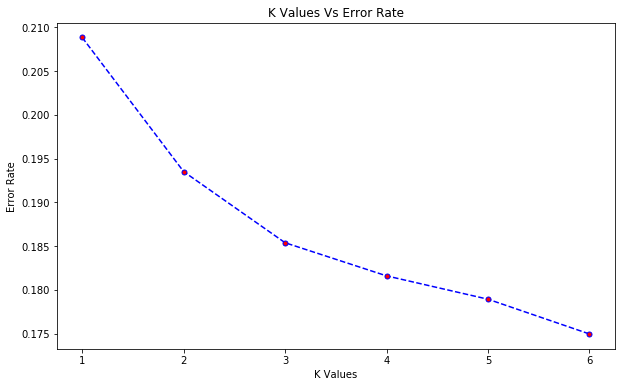

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,7), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('K Values Vs Error Rate')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

# For K = 6
From the above plot, it is evident that the error rate goes down as we increase the 'K' value till k=6. We may further calculate the K values, but the features are too large and it takes a lot of time to calculate the error rate for larger K values.
You may try with larger K values if you wish.

NOTE: If you find the below value of 'K' not equal to 6, then i would have been experimenting with the values of 'K' to get the optimal result. But anyway, you get the essene right !

Hence now training and fitting the model for K=6 and evaluating the model

In [47]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [48]:
pred = knn.predict(X_test)

Evaluating the model

In [58]:
print(classification_report(y_test, pred))
print('\n')
print("Confusion Metric: \n", confusion_matrix(y_test, pred))
print('\n')
print("Accuracy Score: ", accuracy_score(y_test, pred))

             precision    recall  f1-score   support

          0       0.86      0.93      0.89     12218
          1       0.70      0.52      0.60      3900

avg / total       0.82      0.83      0.82     16118



Confusion Metric: 
 [[11349   869]
 [ 1875  2025]]


Accuracy Score:  0.829755552798
